# Plotten van meta data ingevulde enquetes per gemeente

In [1]:
#benodigde libraries
import pandas as pd
import geopandas as gpd
import cbsodata
import matplotlib.pyplot as plt

In [2]:
# lezen gegevens enquete
df = pd.read_excel('ledenenquete_over_heel_de_mens.xlsx', skiprows=2, names = ['Serienummer', 'SID', 'Submitted Time', 'Verwerkingstijd',
       'Modified Time', 'Kladversie', 'IP-adres', 'UID', 'Gebruikersnaam',
       'Naam', 'Email', 'Afdeling',
       'indruk', 'ontwikkelingen', 'redenen', 'meegeven']) 

In [3]:
# aantallen ophalen voor alle enquetes, ongeacht afgemaakt
freq = df['Afdeling'].value_counts()
freq = freq.reset_index()

In [4]:
# aantallen ophalen voor alle enquetes, alleen afgemaakt
df_complete = df[df.Verwerkingstijd.notnull()]
freq_sub = df_complete['Afdeling'].value_counts()
freq_sub = freq_sub.reset_index()

In [5]:
#df.head(2)

# Gemeentegrenzen 

In [6]:
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2021_gegeneraliseerd&outputFormat=json'
gemeentegrenzen = gpd.read_file(geodata_url)

In [7]:
gemeentegrenzen.head()

,id,statcode,statnaam,jrstatcode,rubriek,geometry
0,cbs_gemeente_2021_gegeneraliseerd.1,GM1979,Eemsdelta,2021GM1979,gemeente,"MULTIPOLYGON (((253004.946 603887.823, 253797...."
1,cbs_gemeente_2021_gegeneraliseerd.2,GM0014,Groningen,2021GM0014,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245344...."
2,cbs_gemeente_2021_gegeneraliseerd.3,GM0034,Almere,2021GM0034,gemeente,"MULTIPOLYGON (((146891.056 493291.709, 147422...."
3,cbs_gemeente_2021_gegeneraliseerd.4,GM0037,Stadskanaal,2021GM0037,gemeente,"MULTIPOLYGON (((263763.866 566430.392, 263988...."
4,cbs_gemeente_2021_gegeneraliseerd.5,GM0047,Veendam,2021GM0047,gemeente,"MULTIPOLYGON (((256231.909 572319.213, 258595...."


# Alleen complete ingevulde enquetes

In [8]:
gemeentegrenzen = gpd.read_file(geodata_url)
gemeentegrenzen = pd.merge(gemeentegrenzen, freq_sub,
                           left_on = "statnaam", 
                           right_on = "index")
gemeentegrenzen.head(2)

,id,statcode,statnaam,jrstatcode,rubriek,geometry,index,Afdeling
0,cbs_gemeente_2021_gegeneraliseerd.1,GM1979,Eemsdelta,2021GM1979,gemeente,"MULTIPOLYGON (((253004.946 603887.823, 253797....",Eemsdelta,13
1,cbs_gemeente_2021_gegeneraliseerd.2,GM0014,Groningen,2021GM0014,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245344....",Groningen,73


In [9]:
file_path = 'data/provincies/B1_Provinciegrenzen_van_NederlandPolygon.shp'
gdf_prov = gpd.read_file(file_path)

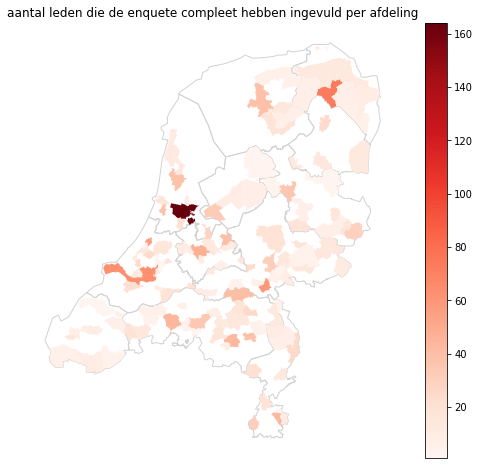

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
p = gdf_prov.plot(ax=ax, facecolor='none', edgecolor='lightgray')
p = gemeentegrenzen.plot(column='Afdeling', ax = ax, legend = True, cmap='Reds')
p.axis('off')
p.set_title('aantal leden die de enquete compleet hebben ingevuld per afdeling')
plt.savefig('compleet.jpg')

# Alle ingevulde enquetes

In [11]:
gemeentegrenzen = gpd.read_file(geodata_url)
gemeentegrenzen = pd.merge(gemeentegrenzen, freq,
                           left_on = "statnaam", 
                           right_on = "index")
gemeentegrenzen.head(2)

,id,statcode,statnaam,jrstatcode,rubriek,geometry,index,Afdeling
0,cbs_gemeente_2021_gegeneraliseerd.1,GM1979,Eemsdelta,2021GM1979,gemeente,"MULTIPOLYGON (((253004.946 603887.823, 253797....",Eemsdelta,17
1,cbs_gemeente_2021_gegeneraliseerd.2,GM0014,Groningen,2021GM0014,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245344....",Groningen,131


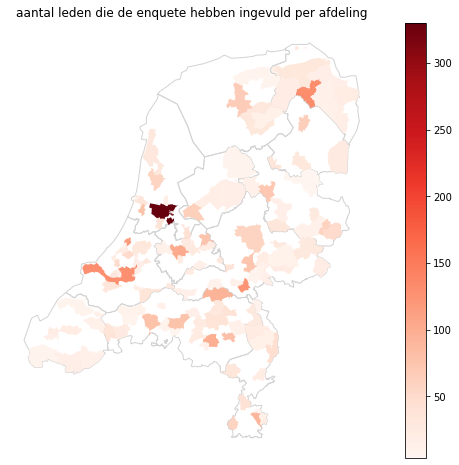

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
p = gdf_prov.plot(ax=ax, facecolor='none', edgecolor='lightgray')
p = gemeentegrenzen.plot(column='Afdeling', ax = ax, legend = True, cmap='Reds')
p.axis('off')
p.set_title('aantal leden die de enquete hebben ingevuld per afdeling')
plt.savefig('all.jpg')